In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib import rcParams
from scipy.interpolate import CubicSpline
rcParams.update({'figure.autolayout': True})
import os
import IPython

Text(0.5, 1.0, 'Raw Data Table')

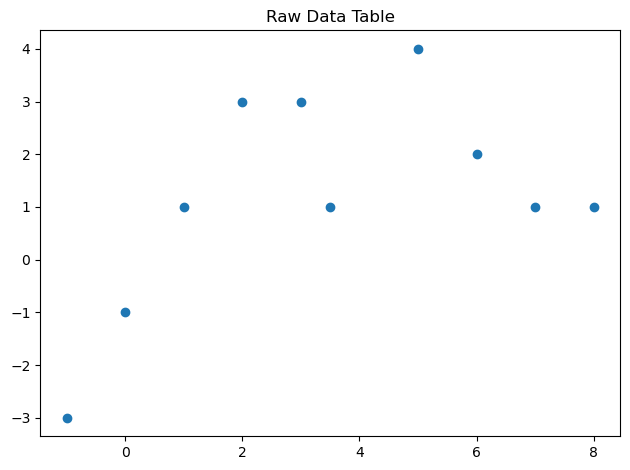

In [2]:
file = np.loadtxt('HW01_data.txt',skiprows= 1)
dt = file.transpose()
plt.scatter(dt[0],dt[1])
plt.title("Raw Data Table")

In [3]:
#linear solve function
#input: x, y: array of x,y coordinates
#return: m and b for function y = mx + b
def linear(x1,x2,y1,y2):
    m = (y2-y1)/(x2-x1)
    b = y2 - x2*m
    return m,b

#linear interpolation function
#input: 
#   dt: array of x and y values of datapoints
#   x_n:  new values to be interpolated at:
#return: ar: array of valid x values and interpolated y values.
def lin_interp(dt,x_n):
    y_f = []
    x_f = []
    sorted_dt = dt[:,dt[0,:].argsort()]
    for i in range(len(dt[0]) -1):
        m,b = linear(dt[0][i],dt[0][i+1], dt[1][i], dt[1][i+1])
        for j in x_n:
            if  (j>  dt[0][i]) & (j<=dt[0][i+1]):
                x_f.append(j)
                y_f.append(m*j+b)
    if len(x_f) == 0:
        raise("No valid x values")
    return [np.asarray(x_f,float),np.asarray(y_f,float)]


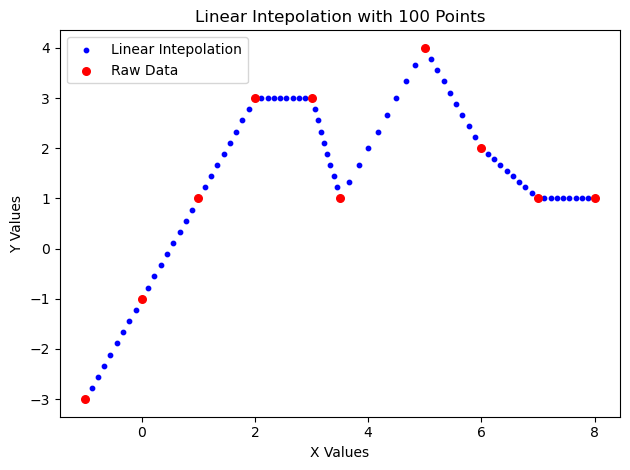

In [4]:
x_val = []
for i in range(len(dt[0])-1):
    x_temp = np.linspace(dt[0][i], dt[0][i+1],10)
    x_val.append(x_temp)
x_val = np.concatenate(x_val)
int_dt = lin_interp(dt,x_val)


plt.scatter(int_dt[0], int_dt[1], c= "blue", s= 10, label ="Linear Intepolation")
plt.scatter(dt[0],dt[1], c="red",s = 30, label = "Raw Data")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.title("Linear Intepolation with 100 Points")
plt.legend()



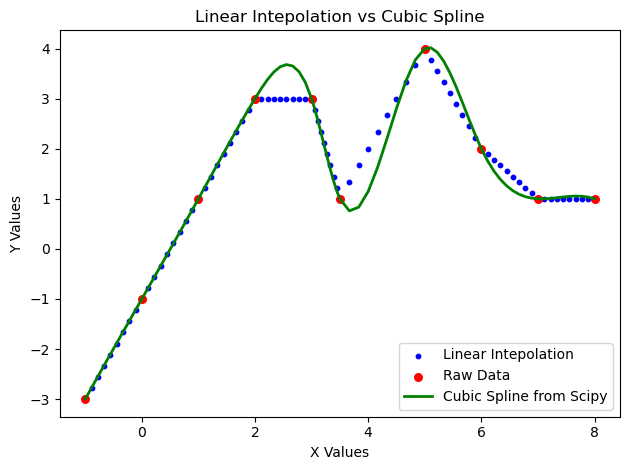

In [5]:
cs = CubicSpline(dt[0],dt[1])
y_cs = cs(x_val)

plt.scatter(int_dt[0], int_dt[1], c= "blue", s= 10, label ="Linear Intepolation")
plt.scatter(dt[0],dt[1], c="red",s = 30, label = "Raw Data")
plt.plot(x_val,y_cs,c = "green",linewidth= 2, label = "Cubic Spline from Scipy")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.title("Linear Intepolation vs Cubic Spline")
plt.legend()



In [6]:
#question 3 function
def q3_f(x):
    return np.sin(np.pi/2 * x) + x/2

In [7]:
#Rinse & Repeat

x2_int = np.linspace(0,10,11)
y2_int = q3_f(x2_int)
x2_val = np.linspace(0,10,100)
y2_val = q3_f(x2_val)
lin2_int = lin_interp(np.asarray([x2_int,y2_int]),x2_val)

cs2 = CubicSpline(x2_int,y2_int)
y2_cs = cs2(x2_val)



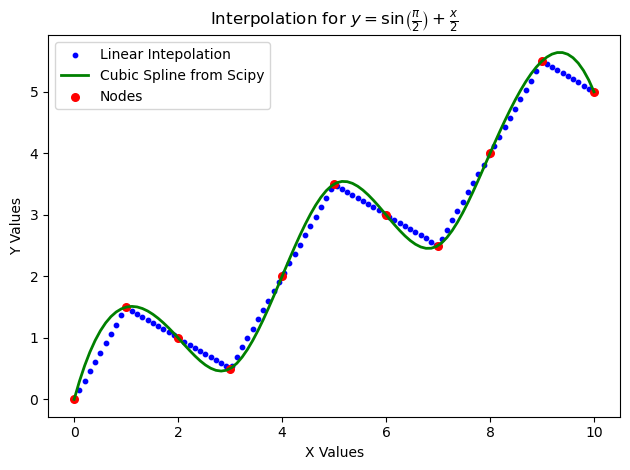

In [8]:
plt.scatter(lin2_int[0], lin2_int[1], c= "blue", s= 10, label ="Linear Intepolation")
plt.plot(x2_val,y2_cs,c = "green",linewidth= 2, label = "Cubic Spline from Scipy")
plt.scatter(x2_int,y2_int, c="red",s = 30, label = "Nodes")
#plt.plot(x_val, y_val, label=r"$y=\sin\!\left(\frac{\pi}{2}\right)+\frac{x}{2}$")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.title(r"Interpolation for $y=\sin\!\left(\frac{\pi}{2}\right)+\frac{x}{2}$")
plt.legend()


/var/folders/sm/sjz00q7943zdql3vzxcjy5rw0000gn/T/ipykernel_15350/511025703.py:6: RuntimeWarning: invalid value encountered in scalar divide
  cs_err[i]  = (y2_cs[i] - q3_f(x2_val[i]))/(q3_f(x2_val[i]))


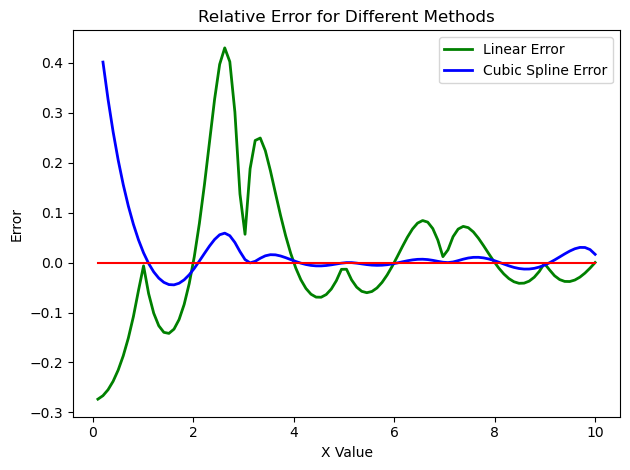

In [12]:
size = 99
lin_err = np.zeros(size)
cs_err = np.zeros(size)
for i in range(size):
    lin_err[i] = (lin2_int[1][i]- q3_f(lin2_int[0][i]))/q3_f(lin2_int[0][i])
    cs_err[i]  = (y2_cs[i] - q3_f(x2_val[i]))/(q3_f(x2_val[i]))
 
plt.plot(lin2_int[0],lin_err,c = "green",linewidth= 2, label = "Linear Error")
plt.plot(lin2_int[0],cs_err, c="blue",linewidth= 2, label = "Cubic Spline Error")
plt.plot(lin2_int[0],np.zeros(99), c = "red")
plt.xlabel("X Value")
plt.ylabel("Error")
plt.title(r"Relative Error for Different Methods")
plt.legend();                              